In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
%matplotlib inline

In [80]:
df = pd.concat(pd.read_excel('Python_File.xlsx', sheet_name=None), ignore_index=True)

In [90]:
# first five column of dataset

df.rename(columns={"SAT MATH": "SAT_MATH", "SAT READING": "SAT_READING", "HIGHEST_DEGREE MASTERS OR HIGHER": "MA_HIGHER", "ELA 4":"ELA_4", "ELA 8":"ELA_8", "MATH 4":"MATH_4", "MATH 8":"MATH_8"}, inplace=True)

In [91]:
# Describe the dataset
df.describe()

,TEACHER_SALARY,EXPERIENCE_ALL,MA_HIGHER,COUNTY_CODE,FULLTIME,CLASSES_TAUGHT,ELA_4,ELA_8,MATH_4,MATH_8,SAT_MATH,SAT_READING,YEAR
count,132.000000,132.000000,132.000000,132.000000,132.0,66.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,63760.384015,12.565809,42.049365,23.681818,1.0,3.028905,62.898326,65.685222,48.577307,39.944366,496.334043,483.949128,2010.166667
std,7294.699039,1.874277,20.599255,17.124741,0.0,1.301691,12.079368,7.408133,6.393857,6.102670,47.942931,47.820889,4.467297
min,42147.950000,4.679739,15.319500,1.000000,1.0,1.094150,30.863636,42.301205,26.706667,21.055556,238.357143,249.071429,2004.000000
25%,58237.835000,12.114537,32.397650,11.000000,1.0,1.305733,52.927392,60.334795,44.492952,35.726887,472.139706,458.742857,2006.000000
50%,63855.100000,12.708030,40.600550,22.000000,1.0,3.618737,61.637806,66.558908,47.496320,40.393548,500.655556,487.237179,2010.000000
75%,69371.895000,13.570253,47.968875,33.000000,1.0,3.955683,72.921482,72.128409,50.845796,44.455060,529.264286,514.095455,2014.000000
max,77958.740000,15.739210,229.571100,80.000000,1.0,5.397390,84.438095,79.062500,69.868421,52.262500,591.166667,587.250000,2017.000000


# Cleaning the dataframe

In [92]:
df.MA_HIGHER= df.MA_HIGHER *100

In [93]:
df.head(100)

,TEACHER_SALARY,EXPERIENCE_ALL,LASTNAME,JOBCODE,MA_HIGHER,COUNTY_CODE,FULLTIME,CLASSES_TAUGHT,ELA_4,ELA_8,MATH_4,MATH_8,SAT_MATH,SAT_READING,YEAR
0,52776.91,11.79733,NA,NA,2439.64,1,1,NaN,75.117544,61.866667,44.408772,38.590476,450.333333,435.851852,2004
1,60864.55,12.98843,NA,NA,5474.50,3,1,NaN,81.722936,74.522302,48.255505,45.878417,511.048276,484.537931,2004
2,53354.49,12.82675,NA,NA,2846.31,5,1,NaN,80.481188,72.122727,48.426733,45.153030,479.423729,471.237288,2004
3,54517.71,14.17657,NA,NA,2643.52,7,1,NaN,76.823438,62.400000,45.855469,40.374648,434.780822,425.945205,2004
4,56682.26,15.69583,NA,NA,2541.67,9,1,NaN,74.150000,56.490909,44.000000,39.709091,493.866667,488.800000,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,64058.28,12.56233,NA,NA,3427.98,15,1,NaN,55.000000,72.235294,55.000000,40.176471,496.785714,472.928571,2014
96,72759.15,12.21626,NA,NA,4549.01,17,1,NaN,48.700000,68.160000,48.700000,39.900000,438.263158,412.473684,2014
97,65416.25,13.08345,NA,NA,4685.79,19,1,NaN,67.500000,70.450000,67.500000,33.050000,561.800000,544.600000,2014
98,70355.51,11.60712,NA,NA,4286.54,21,1,NaN,51.604167,60.800000,51.604167,29.666667,513.214286,500.500000,2014


# Translate County Codes to County Names

In [94]:
# The dataset only stores COUNTY_CODE, this dictionary will be useful to plot categorical Data
countyNameCode = {
    1: 'Atlantic',
    3: 'Bergen',
    5: 'Burlington',
    7: 'Camden',
    9: 'Cape May',
    11: 'Cumberland',
    13: 'Essex',
    15: 'Gloucester',
    17: 'Hudson',
    19: 'Hunterdon',
    21: 'Mercer',
    23: 'Middlesex',
    25: 'Monmouth',
    27: 'Morris', 
    29: 'Ocean', 
    31: 'Passaic', 
    33: 'Salem', 
    35: 'Somerset', 
    37: 'Sussex',
    39: 'Union',
    41: 'Warren',
    80: 'Charter'
    }

In [95]:
def codeToName(code):
    return countyNameCode.get(code)

In [96]:
df['COUNTY'] = df.apply(lambda x: codeToName(x['COUNTY_CODE']), axis=1)

# Data Visualization

In [97]:
# Configurations for visualizations

In [98]:
sns.set(style='whitegrid', rc={"figure.figsize": [20, 8]})

### Teacher Count by County

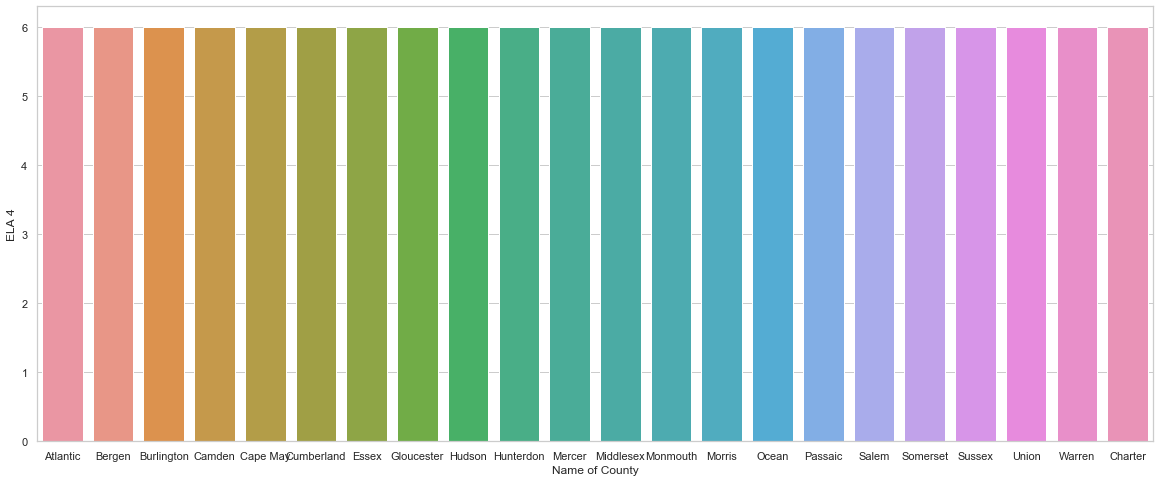

In [99]:
sns.countplot(df['COUNTY']).set(xlabel='Name of County', ylabel= 'ELA 4');

### Box plot of Teacher Salary vs County

This chart will allow us to comapre averages, max and minimum salaries of all counties.

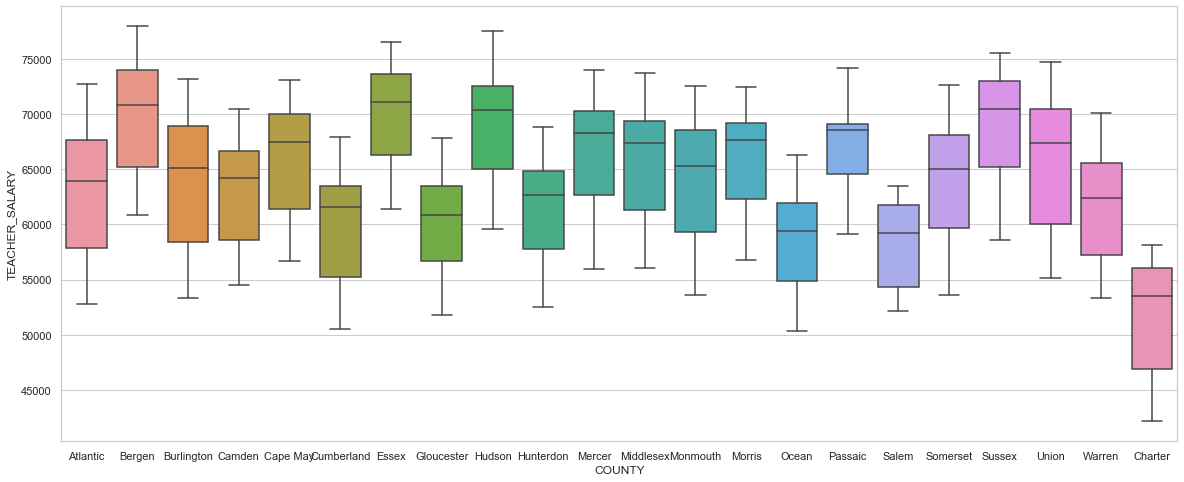

In [100]:
sns.boxplot(x="COUNTY", y="TEACHER_SALARY",data=df)

## Plotting heatmap to see if any columns are correlated

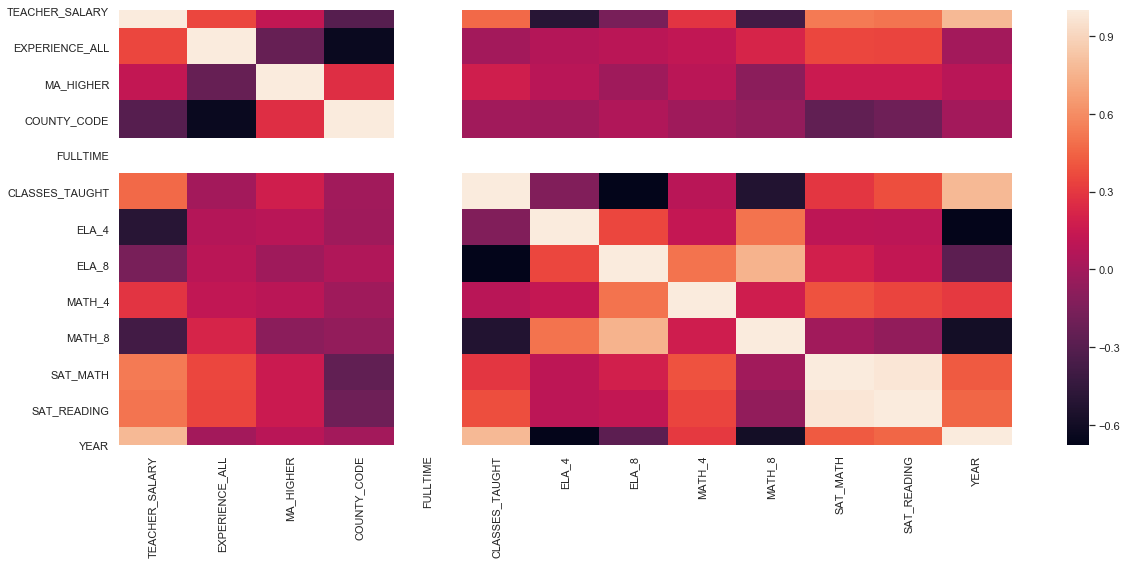

In [101]:
sns.heatmap(df.corr())

#### It seems YEARS_TAUGHT and TEACHER_SALARY are correlated.


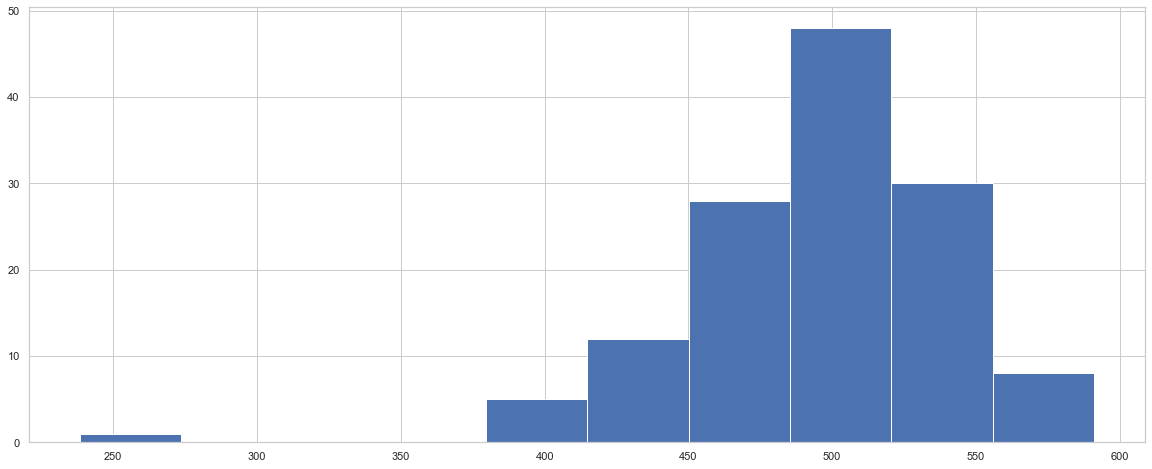

In [103]:
df['SAT_MATH'].hist()

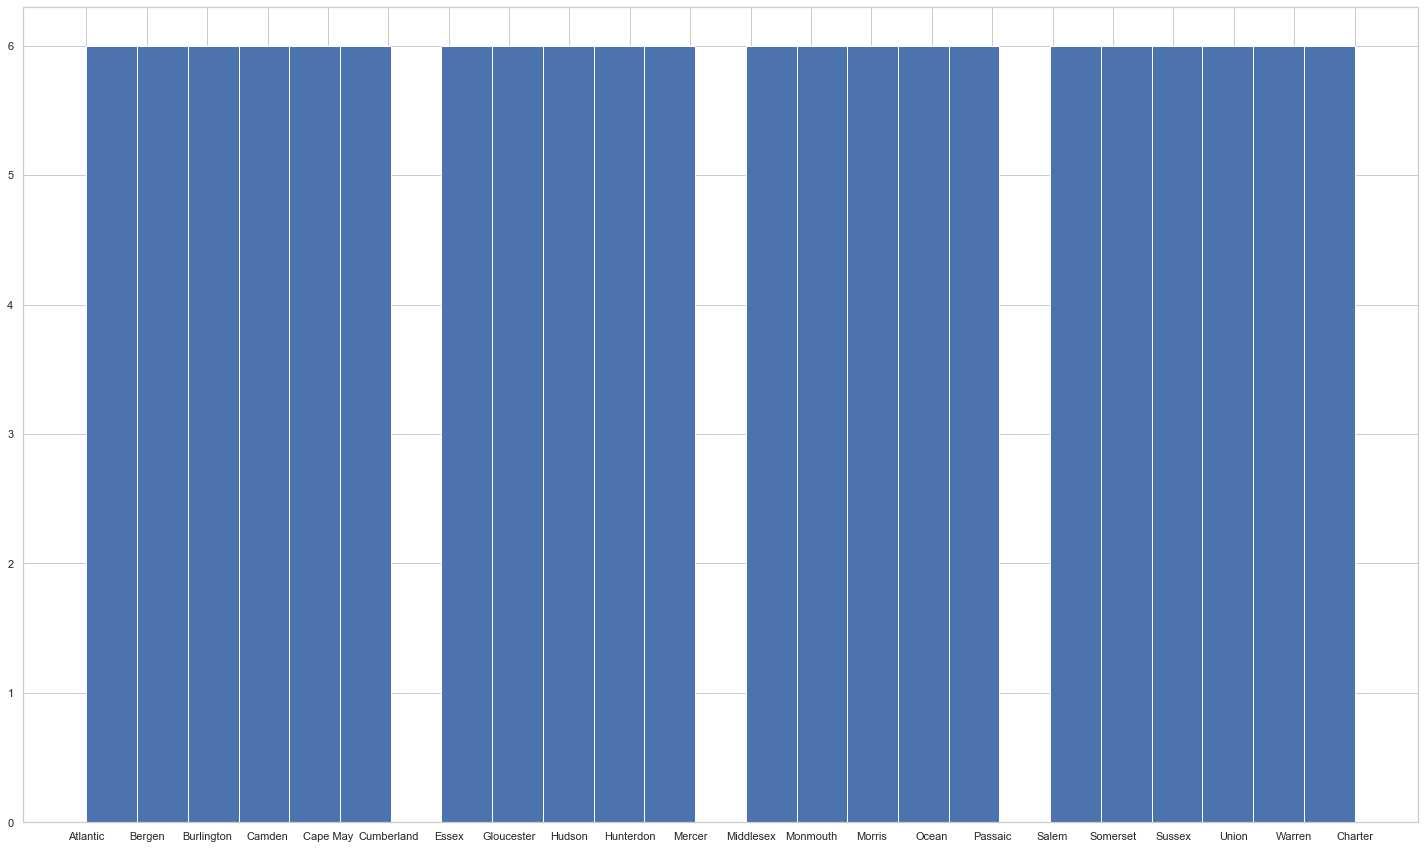

In [104]:
df['COUNTY'].hist(figsize=(25,15), bins=25)

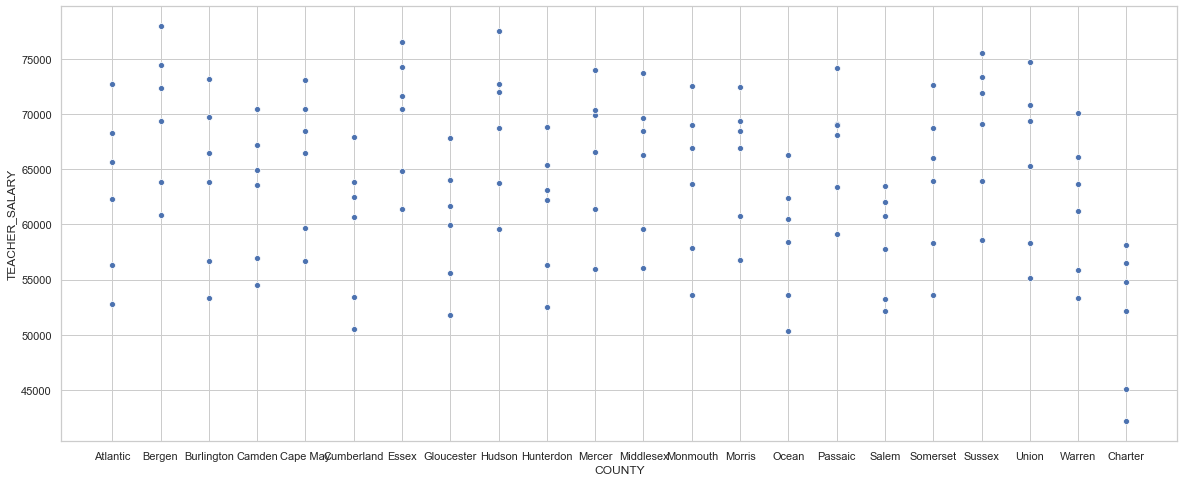

In [105]:
sns.scatterplot(x='COUNTY', y='TEACHER_SALARY', data=df)

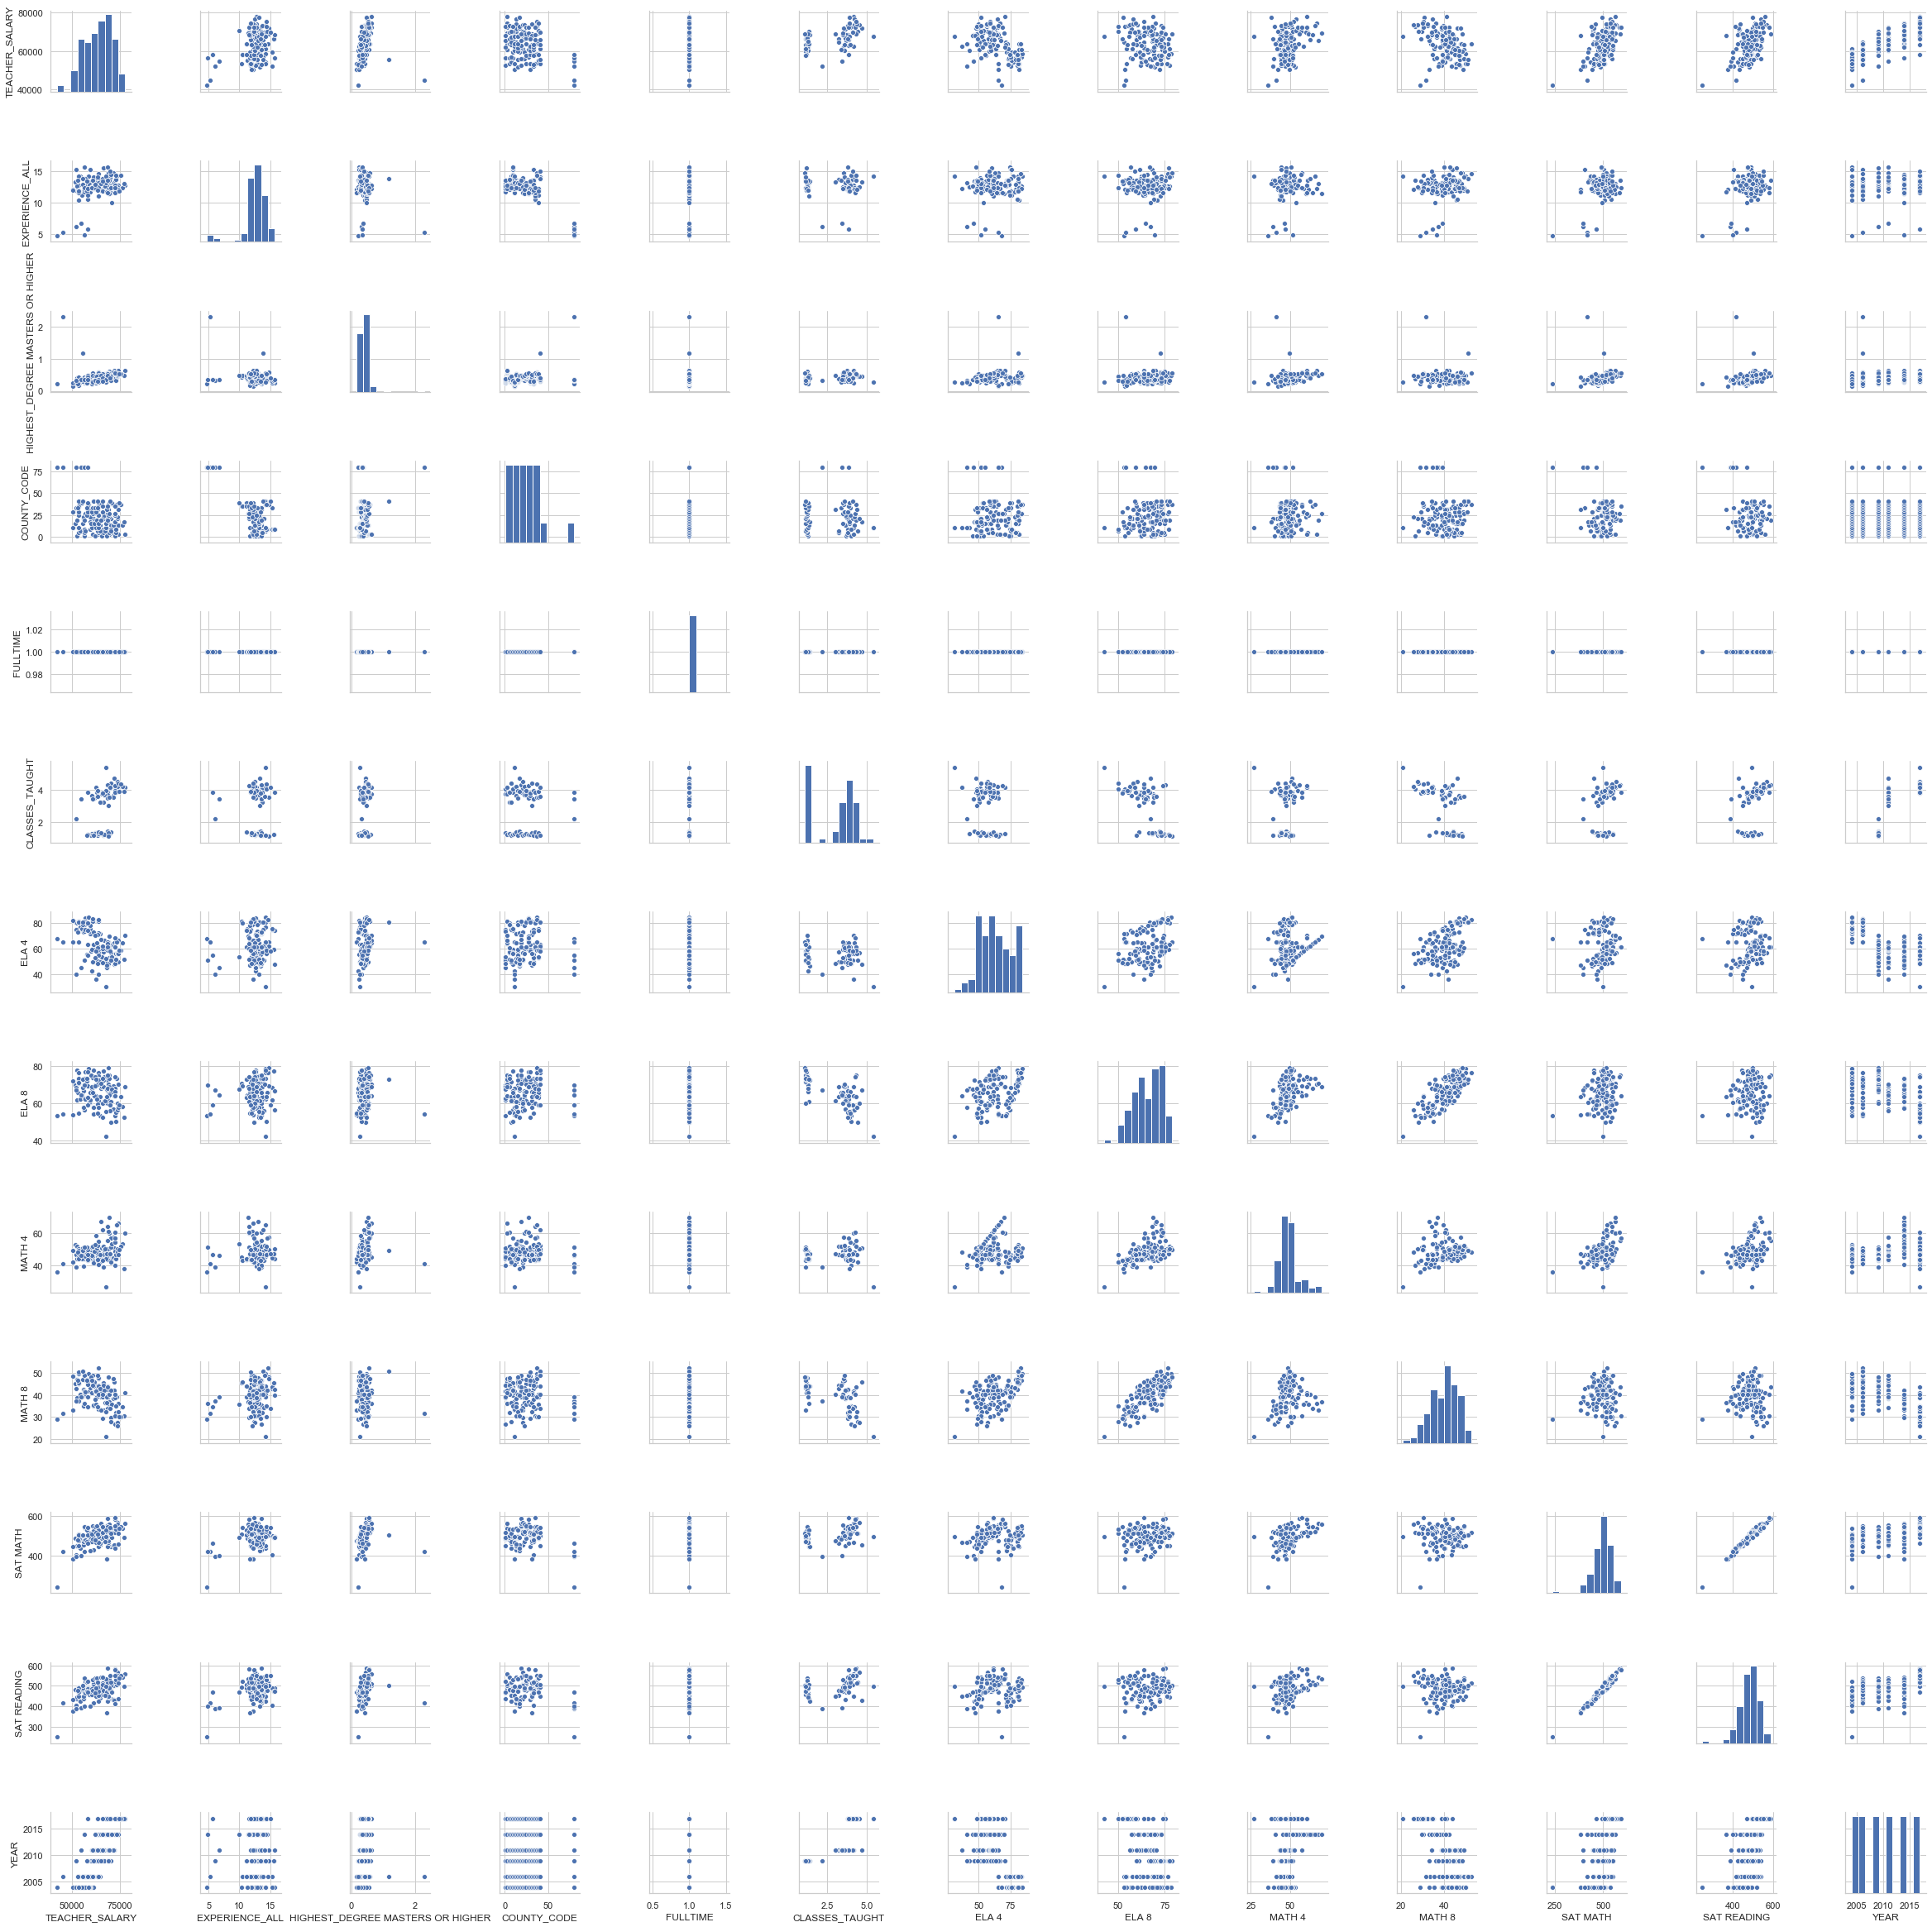

In [67]:
sns.pairplot(df)

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
#fig = plt.figure(figsize=(16, 8))
#ax = fig.add_subplot(1, 1, 1)
Y = df.TEACHER_SALARY 
X = df[['SAT_MATH', 'SAT_READING','EXPERIENCE_ALL', 'MA_HIGHER', 'ELA_8', 'MATH_8']]
#ax.scatter(x=X, y=Y, marker="o", color="red")
X_reg = sm.add_constant(X)
res = sm.OLS(Y, X_reg).fit()
#b, a = res.params
#ax.plot(X, a * X + b)
res.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TEACHER_SALARY   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     26.79
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           2.40e-20
Time:                        00:09:57   Log-Likelihood:                -1306.4
No. Observations:                 132   AIC:                             2627.
Df Residuals:                     125   BIC:                             2647.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.705e+04   5726.670      6.470      0.000    2.57e+04    4.84e+04
SAT_MATH         190.8710     47.157      4.048      0.000      97.542     284.200
SAT_READING     -140.9452     46.857     -3.008      0.003    -233.682     -48.208
EXPERIENCE_ALL  1475.1353    274.559      5.373      0.000     931.750    2018.521
MA_HIGHER          0.3517      0.224      1.570      0.119      -0.092       0.795
ELA_8            160.5747     96.251      1.668      0.098     -29.918     351.067
MATH_8          -760.5420    117.705     -6.461      0.000    -993.494    -527.590
==============================================================================
Omnibus:                        0.242   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.353
Skew:                           0.094   Prob(JB):                        0.838
Kurtosis:                       2.829   Cond. No.                     6.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""